In [1]:
import sys
sys.path.append("./../../utils/")
sys.path.append("./../../")
from sklearn.preprocessing import StandardScaler
from datetime import datetime

#Modules of src folder
from tools import dotdict
import run_non_deepl
%matplotlib inline
%pwd
%cd ..
%cd ..
%pwd

/Users/timw/Documents/University/thesis_2/scripts
/Users/timw/Documents/University/thesis_2


'/Users/timw/Documents/University/thesis_2'

In [2]:
args = dotdict({})
args.model_params = dotdict({})
args.train_params = dotdict({})

args.experiment_name = "Exp1.2"
args.fix_seed = 2024
args.itr = 1

# Data loading
args.from_raw = True
args.file_name = 'smard_data.csv'#"ts_60_sindex_DE_3f.csv"

from_raw_folder = "raw" if args.from_raw else "preproc_non_deepl"
args.path = f"./data/{from_raw_folder}/{args.file_name}"

# Preprocessing
args.scaler_name = "std"
args.scaler = {"std":StandardScaler()}[args.scaler_name]

# Model and its hyperparameters
args.model_name = "repeat"
args.model_params = None
args.train_params = None

# Prediction
args.forecast_setting = "both"
args.cols_to_lag = ['load', 'solar_gen', 'wind_gen']
args.targets = [['wind_gen']]
args.window_size = 6
args.stride = 1 # Has to be <= min(window_size, forecast_horizon) and stride * integer = window_size,
# and stride * integer2 = forecast_horizon, for 24 it is perfect for dummy
args.lead_time = 0 # TODO: Not working yet
args.forecast_horizons = [24, 96, 192, 336, 720]

# Plotting
args.plot = True
args.plot_date = '2021-07-09'
args.days = 10

# Save model
args.save_model = False
args.save_benchmark = True
args.date_time = datetime.now().strftime("%m-%d-%H")

------- Starting to train repeat on ['wind_gen'] for horizons [24, 96, 192, 336, 720] ----------
                       mae       mse
target   horizon                    
wind_gen 24       0.529830  0.579763
         96       0.873263  1.420981
         192      0.986035  1.745276
         336      1.050246  1.958757
         720      1.094277  2.083378


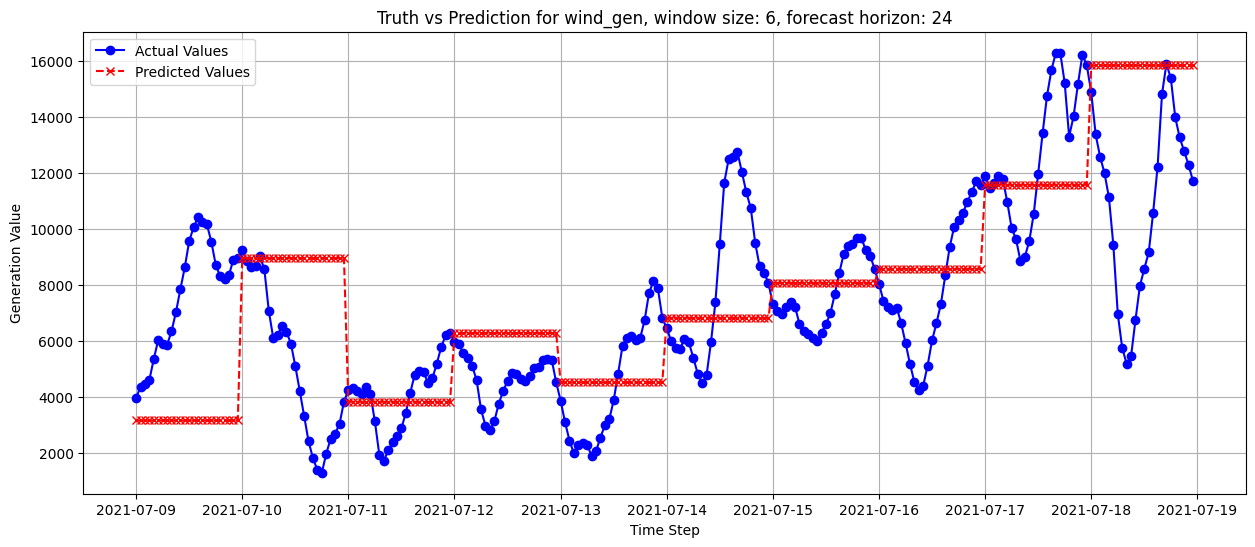

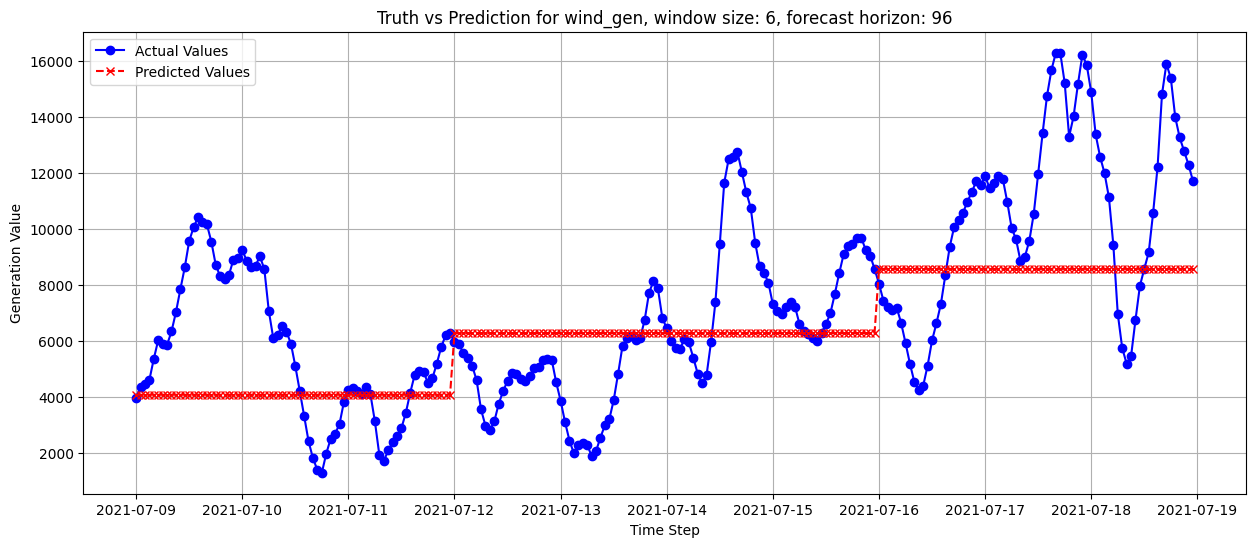

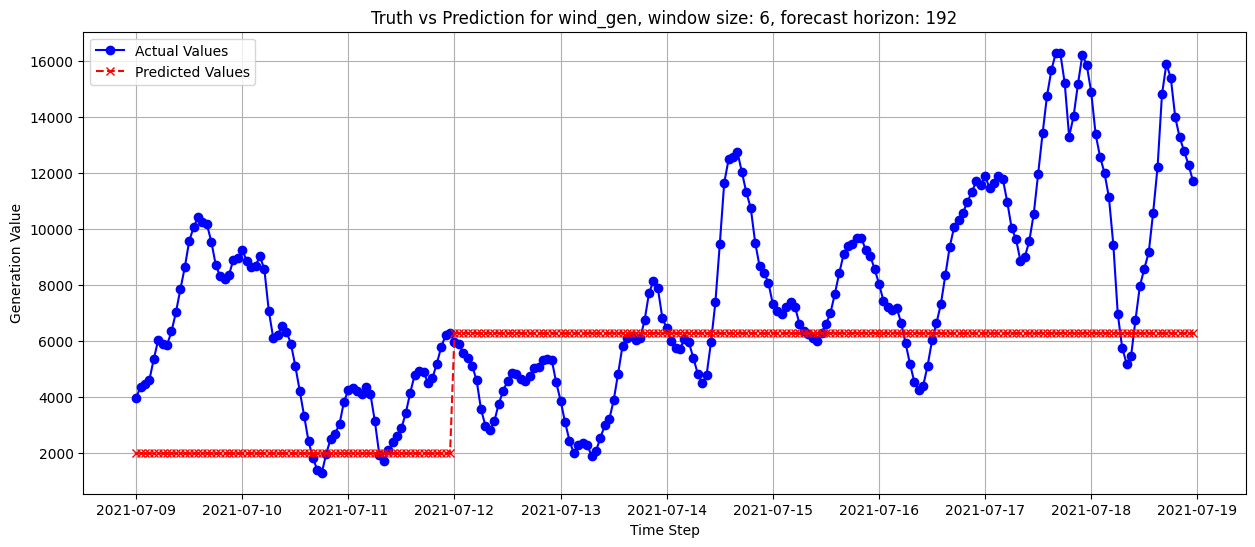

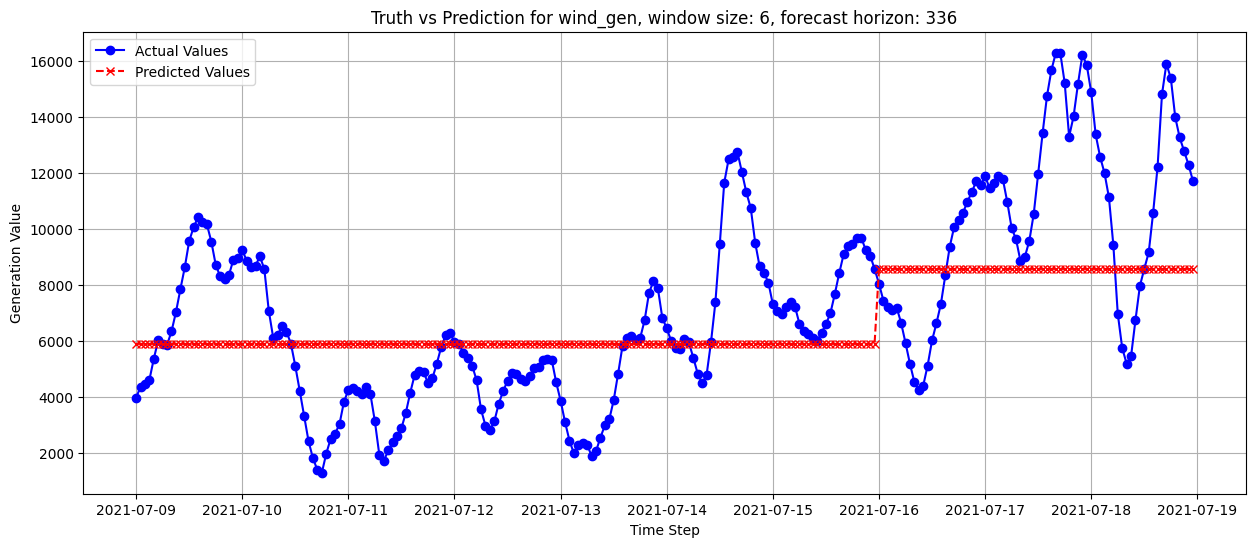

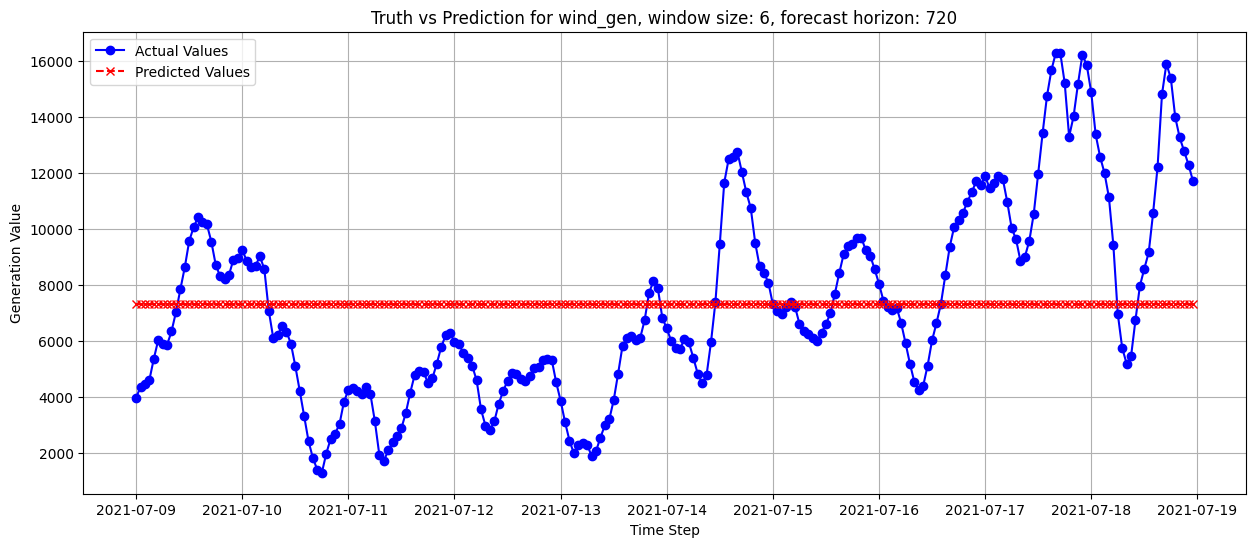

In [3]:
run_non_deepl.pipeline(args)